## Классификатор ирисов
Выполнил: Величко Арсений, ИВТ 4


# Раздел 1: Постановка задачи (Business Understanding)
Цель: Построить классификатор для предсказания типа цветков ириса на основе их физических характеристик. Задача состоит в том, чтобы на основании длины и ширины лепестков и чашелистиков предсказать вид цветка (один из трех классов).

# Раздел 2: Изучение данных (Data Understanding)
Импортируем необходимые библиотеки и загрузим датасет "Ирисы" из библиотеки `scikit-learn`. Проанализируем структуру данных и посмотрим на их первые строки.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Раздел 3: Подготовка данных (Data Preparation)
Для начала разделим данные на признаки (X) и целевые метки (y), затем на тренировочную и тестовую выборки.

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Размер тренировочной выборки: {X_train.shape[0]} объектов')
print(f'Размер тестовой выборки: {X_test.shape[0]} объектов')

Размер тренировочной выборки: 120 объектов
Размер тестовой выборки: 30 объектов


# Раздел 4: Моделирование (Modeling)
Создадим и обучим модель случайного леса (RandomForestClassifier).

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Раздел 5: Оценка модели (Evaluation)
Проверим точность модели на тестовых данных и выведем отчет по классификации.

In [4]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели на тестовых данных: {accuracy:.2f}')

print('\nОтчет по классификации:\n', classification_report(y_test, y_pred, target_names=iris.target_names))

Точность модели на тестовых данных: 1.00

Отчет по классификации:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Раздел 6: Визуализация результатов (Deployment/Evaluation)
Построим матрицу ошибок для оценки точности классификации.

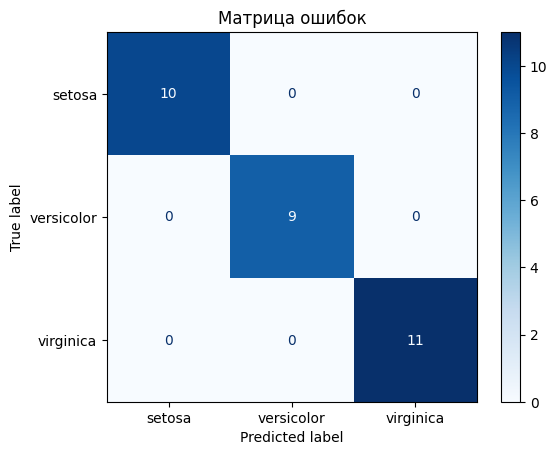

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()